Measurement_Data/Glock/Data/
Opening files from this path =  Measurement_Data/Glock/Data/
6
R [-4.58913927e-04 -2.59047684e-05 -5.05659630e-05] [[-0.8379602  -0.52313828 -0.15539963]
 [-0.06433279 -0.18807708  0.98004505]
 [ 0.5419262  -0.83123604 -0.12394616]] 1
Rtilde [0.00081882 0.00020307 0.00036142] [[ 0.84266398  0.53672885 -0.04289012]
 [ 0.01861348  0.05057096  0.998547  ]
 [-0.53811798  0.84223792 -0.03262393]] 1
I [3.67379456e-04 4.26278314e-05 8.33858537e-05] [[ 0.84183346  0.5292891  -0.1056858 ]
 [ 0.03980967  0.13438678  0.99012897]
 [-0.53826724  0.83773101 -0.09206046]] 1
7
R [-5.29767188e-04 -3.31382865e-05 -6.56933042e-05] [[-0.83857723 -0.52452332 -0.14718531]
 [-0.06082388 -0.17833963  0.98208728]
 [ 0.54137666 -0.83250841 -0.11764801]] 1
Rtilde [0.00074794 0.00019577 0.00034639] [[ 0.84265237  0.53709762 -0.0382508 ]
 [ 0.01631817  0.04553267  0.99882956]
 [-0.53821064  0.84229028 -0.02960376]] 1
I [3.56999048e-04 4.91861241e-05 9.51297812e-05] [[ 0.84286547  0.529

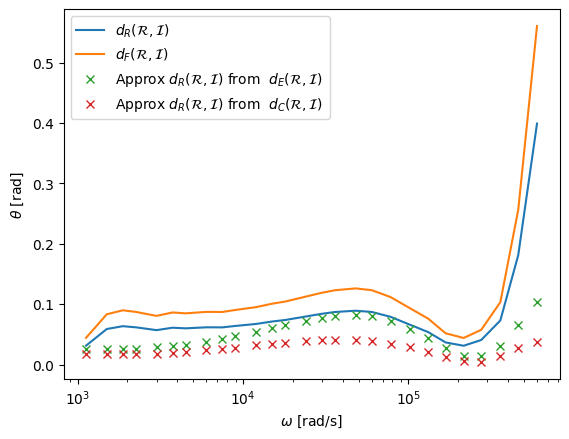

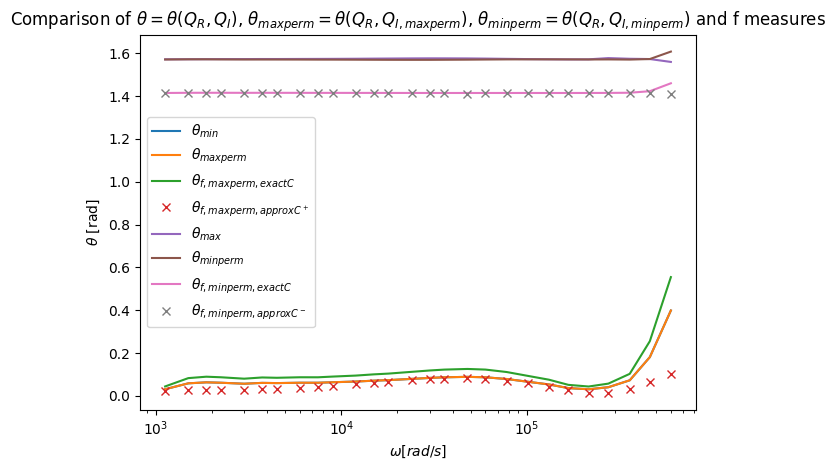

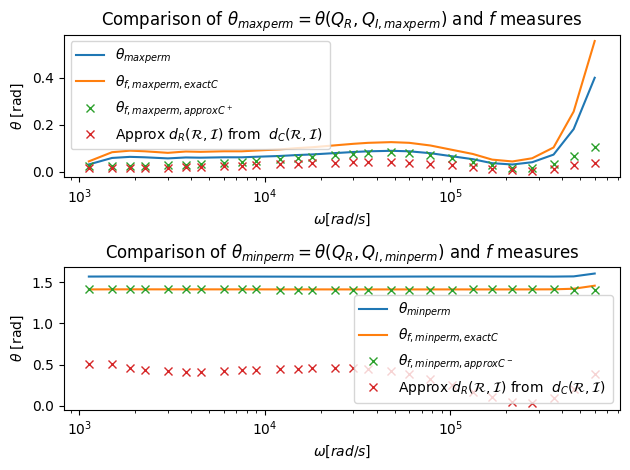

6 1.0
[0.00036142 0.00081882 0.00020307] [8.33858537e-05 4.26278314e-05 3.67379456e-04]
[[ 0.04289012  0.84266398  0.53672885]
 [-0.998547    0.01861348  0.05057096]
 [ 0.03262393 -0.53811798  0.84223792]] [[ 0.1056858   0.5292891  -0.84183346]
 [-0.99012897  0.13438678 -0.03980967]
 [ 0.09206046  0.83773101  0.53826724]]
0.08688384583883331 1.5740751937326978
0.1228723131364113 2.0032761777275128
7 1.0
[0.00019577 0.00034639 0.00074794] [3.56999048e-04 9.51297812e-05 4.91861241e-05]
[[ 0.53709762 -0.0382508   0.84265237]
 [ 0.04553267  0.99882956  0.01631817]
 [ 0.84229028 -0.02960376 -0.53821064]] [[-0.84286547 -0.09394597  0.52986032]
 [-0.0321005   0.99166721  0.12476256]
 [ 0.53716605 -0.08814927  0.83885776]]
0.08115596583433897 1.5747771122113638
0.11477186755040973 2.0039768211262206
Computing F measure Tilde


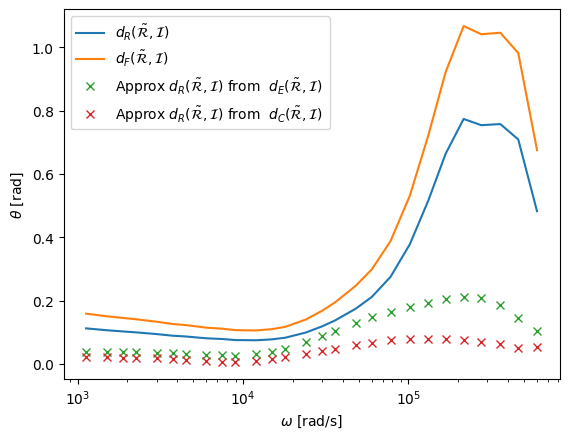

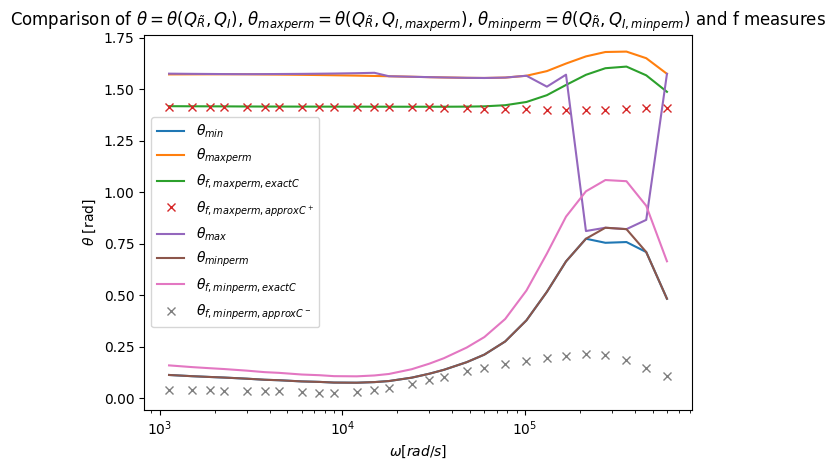

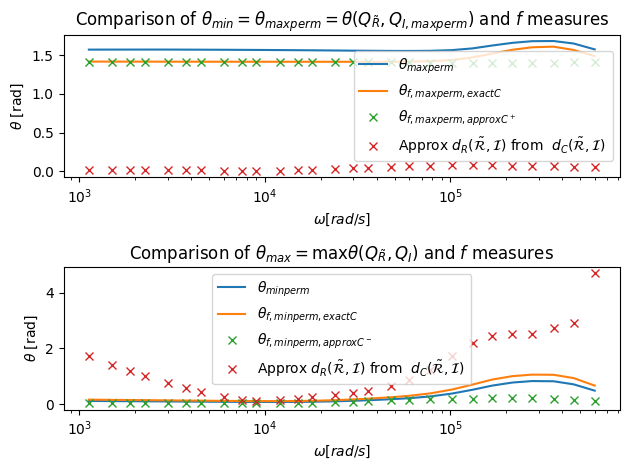

6 1.0
[0.00022939 0.00127727 0.00041204] [3.67379456e-04 4.26278314e-05 8.33858537e-05]
[[ 0.53661381  0.84081877 -0.07119981]
 [ 0.06925666  0.0402073   0.99678829]
 [ 0.84098105 -0.53982143 -0.03665651]] [[-0.84183346  0.5292891  -0.1056858 ]
 [-0.03980967  0.13438678  0.99012897]
 [ 0.53826724  0.83773101 -0.09206046]]
0.0656238458205274 1.5736769422218324
0.09280613277447082 2.0028785399450184
7 1.0
[0.00127727 0.00022939 0.00041204] [9.51297812e-05 4.91861241e-05 3.56999048e-04]
[[ 0.84081877  0.53661381 -0.07119981]
 [ 0.0402073   0.06925666  0.99678829]
 [-0.53982143  0.84098105 -0.03665651]] [[ 0.09394597  0.52986032  0.84286547]
 [-0.99166721  0.12476256  0.0321005 ]
 [ 0.08814927  0.83885776 -0.53716605]]
0.05658224520822358 1.5799739184855404
0.08001937856298988 2.009156502471487


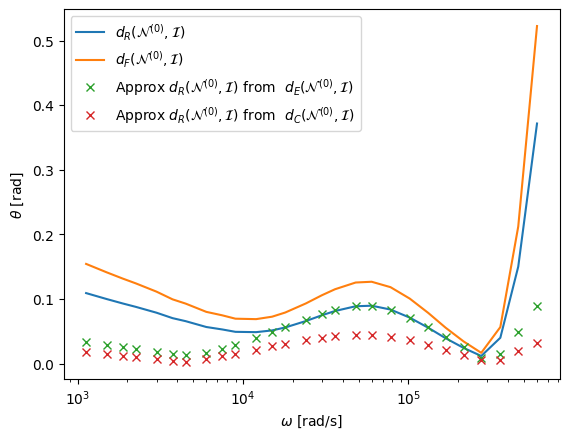

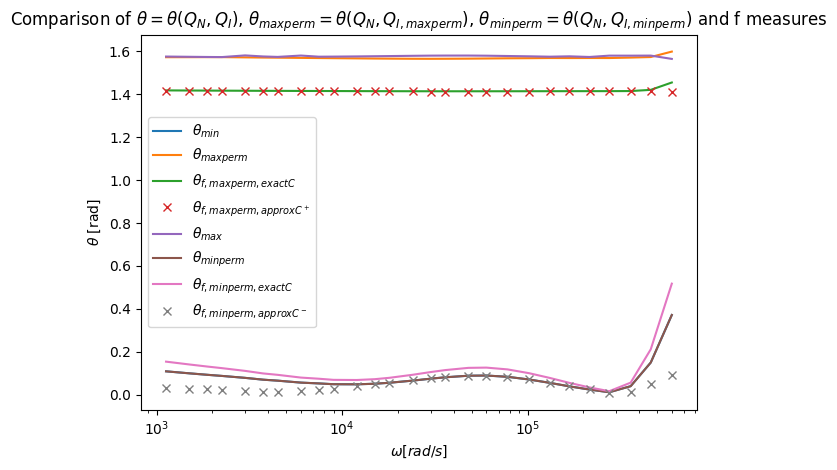

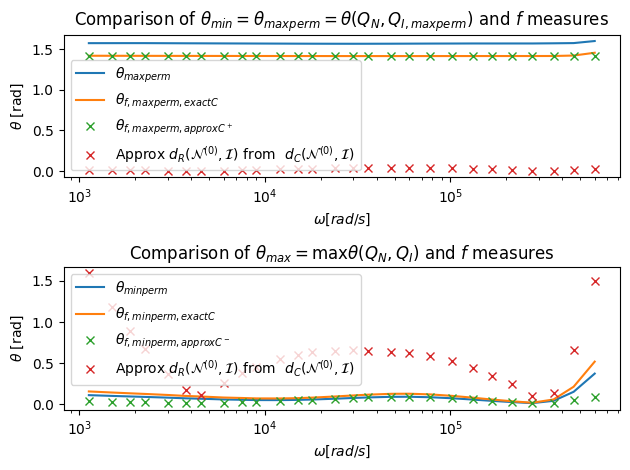

In [1]:
from main import main
from matplotlib import pyplot as plt
import numpy as np

DirList=["Measurement_Data/Glock/Data/"]

MaxOmega=1e8
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults,N0IResults=main(directory,MaxOmega,Figures="On")
    plt.show()


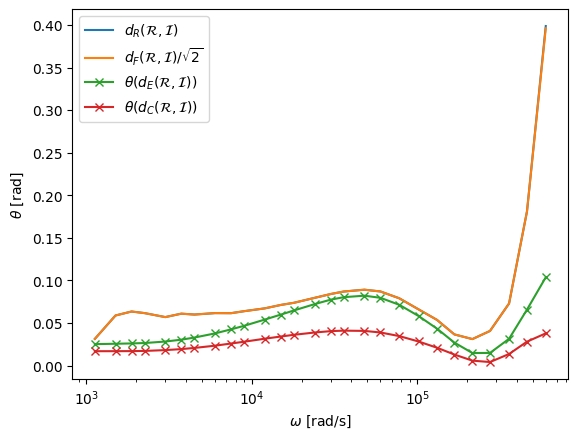

In [6]:
Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"]
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.3)
plt.legend()
#plt.savefig("glock_dRanddE_metrics.pdf")
plt.savefig("glock_measured_RI.pdf")
plt.show()

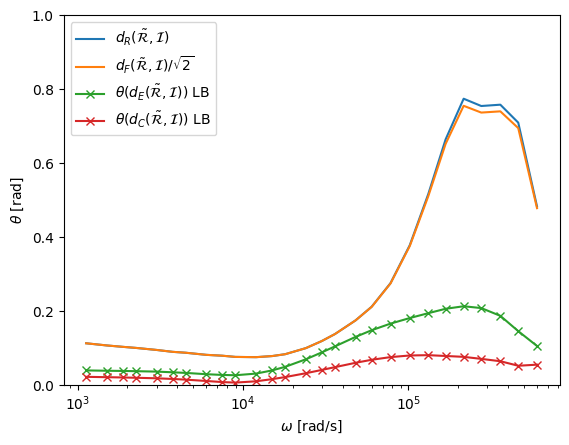

In [8]:
Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,1.0)
plt.legend()
#plt.savefig("glock_dRanddE_metrics_tilde.pdf")
plt.savefig("glock_measured_RtildeI.pdf")
plt.show()

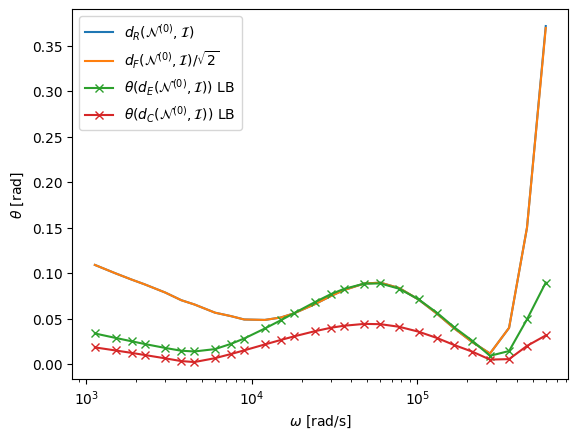

In [11]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("glock_measured_N0I.pdf")

plt.show()

In [3]:
# Read data
TensorArray = np.genfromtxt(directory+'Tensors.csv', dtype=complex, delimiter=', ')
N0 =          np.genfromtxt(directory+'N0.csv', dtype=float, delimiter=',')
Frequencies = np.genfromtxt(directory+'Frequencies.csv', dtype=float, delimiter=', ')

N=len(Frequencies)
LambdaR =np.zeros((N,3))
LambdaI =np.zeros((N,3))

for n in range(N):
    Mlist = TensorArray[n,:]
    Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
    Rtilde = np.real(Mten)
    I = np.imag(Mten)
    
    # Computation of eigenvalues, eigenvector
    uI,VI = np.linalg.eig(I)
    uRtilde,VRtilde = np.linalg.eig(Rtilde)
    LambdaR[n,:]=uRtilde[:]
    LambdaI[n,:]=uI[:]
    
    

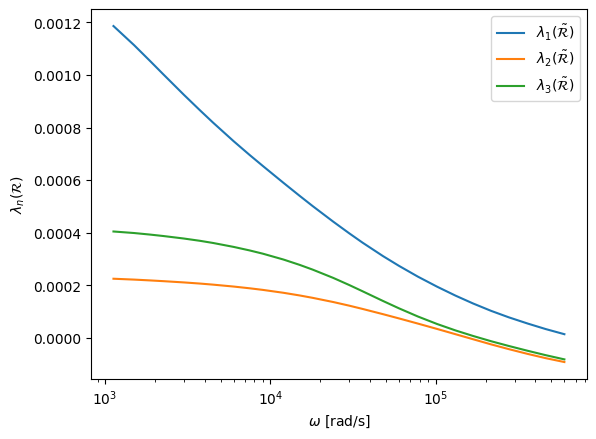

In [20]:
plt.figure()
labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies[:], LambdaR[:,n], label=labels[n])
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\lambda_n({\cal R})$')
plt.legend()
plt.savefig("glock_measured_RealEigenvalues.pdf")
plt.show()


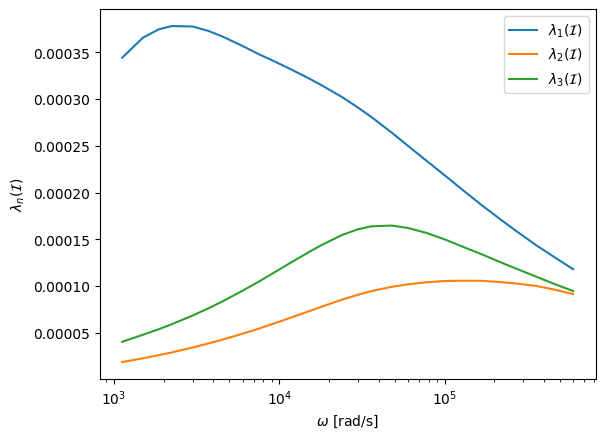

In [21]:
plt.figure()
labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies[:], LambdaI[:,n], label=labels[n])
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\lambda_n({\cal I})$')
plt.legend()
plt.savefig("glock_measured_ImaginaryEigenvalues.pdf")
plt.show()

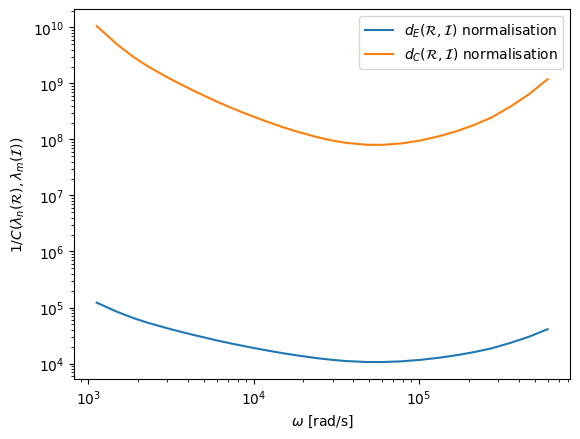

In [3]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("glock_measured_RI_den.pdf")
plt.show()

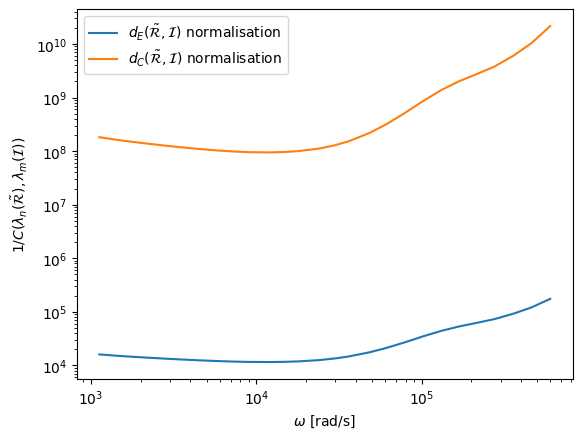

In [5]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("glock_measured_Rtilde0I_den.pdf")
plt.show()

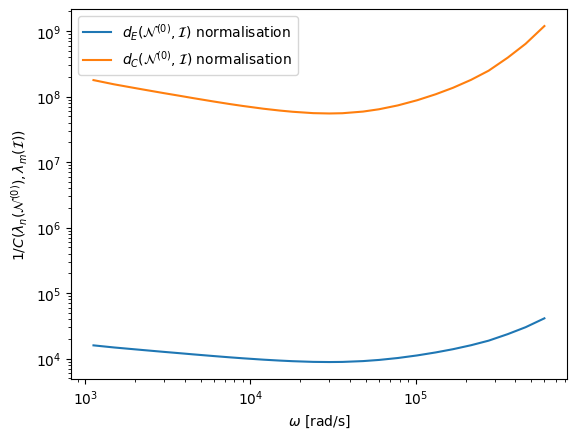

In [4]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("glock_measured_N0I_den.pdf")
plt.show()